In [1]:
import sklearn
sklearn.__version__

'0.21.2'

In [2]:
import numpy as np
import pandas as pd     
from sklearn import neighbors, datasets   

# for basic plotting jobs 
import pylab as pl 

# for mapping colours to an array of values
from matplotlib.colors import ListedColormap     

from sklearn.model_selection import train_test_split

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

# plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

In [3]:
# Load iris data from 'datasets module'
iris = datasets.load_iris()

# Get data-records and record-labels in arrays X and y
X=iris.data
y=iris.target

In [4]:
# Create an instance of KNeighborsClassifier and then fit training data
clf = neighbors.KNeighborsClassifier()
clf.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
# Make class predictions for all observations in X
Z = clf.predict(X)

In [6]:
# Compare predicted class labels with actual class labels
accuracy=clf.score(X, y)
print ("Predicted model accuracy: "+ str(accuracy))


Predicted model accuracy: 0.9666666666666667


In [7]:
# Add the row of predicted classes to y-array for ease of comparison
A = np.vstack([y, Z])
print(A)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
  2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2
  2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2]]


In [8]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [9]:
# load the training data from iris.txt
df = pd.read_csv(location )
df.head()

sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [10]:
# Separate four data attributes and class data (the 5th attribute)
# Slice data-frame column wise. When slicing the data frame using iloc,
# the start bound (0) is included, while the upper bound (4) is excluded.
X  =  df.iloc[:, 0:4]    # X includes columns 0,1,2,3
y  =  df['class']        # Get last column

In [11]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X, y)

Z = clf.predict(X)

accuracy = clf.score(X, y)

print ("Predicted model accuracy: "+ str(accuracy))

# Type of Z is numpy ndarray. Add, Z, to iris data frame as last column
df['Z'] = Z

# Compare two classes: actual and predicted
# df.iloc[:,4:6]

Predicted model accuracy: 0.9666666666666667


In [12]:
df.head()

sepal_length  sepal_width  petal_length  petal_width        class  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

             Z  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

# decision boundary example

#### Now ...
- use only 2 of Iris-data attributes for predicting flower-classes. 

- On X-Y plane we plot the 2 attributes; 

- divide the area (positive quadrant) using a grid; evaluate the class of each point on the grid and color that cell with one of the 3 colors to display its class. 

- Since there are 3 classes, there will be 3 class-centroids and certain adjacent points will have one color (class) and far away points will have different color (class). 

In [13]:
# load the training data from iris.txt
df = pd.read_csv(location )
df.shape

(150, 5)

In [14]:
# Recode three class values: 
# Iris-setosa     as 0
# Iris-versicolor as 1
# Iris-virginica  as 2

In [15]:
df['class'].replace('Iris-virginica',  2, inplace=True)
df['class'].replace('Iris-versicolor', 1, inplace=True)
df['class'].replace('Iris-setosa',     0, inplace=True)

In [16]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
features_selected = ['sepal_length', 'petal_length']

In [18]:
# Slice df to include only cols 0 & 1
# X = df.iloc[:, :2]  

X = df[features_selected]
y = df['class']     # Get last column

In [19]:
# Modelling 
clf = neighbors.KNeighborsClassifier()
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
X[:3]

sepal_length  petal_length
0           5.1           1.4
1           4.9           1.4
2           4.7           1.3

In [22]:
print('column 1 min and max value : ', X.iloc[:, 0].min(), X.iloc[:, 0].max())
print('column 2 min and max value : ', X.iloc[:, 1].min(), X.iloc[:, 1].max())

column 1 min and max value :  4.3 7.9
column 2 min and max value :  1.0 6.9


In [23]:
# Fix four corners of grid boundaries: Corners are
# as per min and max values of each of the two Iris attributes
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

print('column 1 min and max value : ', x_min, x_max)
print('column 2 min and max value : ', y_min, y_max)

column 1 min and max value :  3.3 8.9
column 2 min and max value :  0.0 7.9


In [40]:
# Create a mesh with 
# bottom-left corner: (x_min, y_min) & 
# top-right corner:   (x_max,y_max). 

# cell width & height: h. (Larger h leads to coarser class-boundaries)
# 'meshgrid' is very useful to evaluate functions on a grid.
h = .01 

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#### Example of meshgrid

In [25]:
np.arange(1, 3, 1)

array([1, 2])

In [26]:
np.arange(11, 13, 1)

array([11, 12])

In [35]:
xx1, yy1 = np.meshgrid(np.arange(1, 3, .01), np.arange(11, 13, .01))
#np.meshgrid(np.arange(1, 3, 1), np.arange(11, 15, 1))

In [36]:
xx1

array([[1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99],
       [1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99],
       [1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99],
       ...,
       [1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99],
       [1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99],
       [1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99]])

In [37]:
yy1

array([[11.  , 11.  , 11.  , ..., 11.  , 11.  , 11.  ],
       [11.01, 11.01, 11.01, ..., 11.01, 11.01, 11.01],
       [11.02, 11.02, 11.02, ..., 11.02, 11.02, 11.02],
       ...,
       [12.97, 12.97, 12.97, ..., 12.97, 12.97, 12.97],
       [12.98, 12.98, 12.98, ..., 12.98, 12.98, 12.98],
       [12.99, 12.99, 12.99, ..., 12.99, 12.99, 12.99]])

In [39]:
len(xx1), len(yy1)

(200, 200)

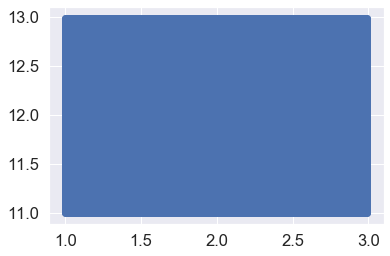

In [38]:
plt.scatter(xx1, yy1);

back to the code ...

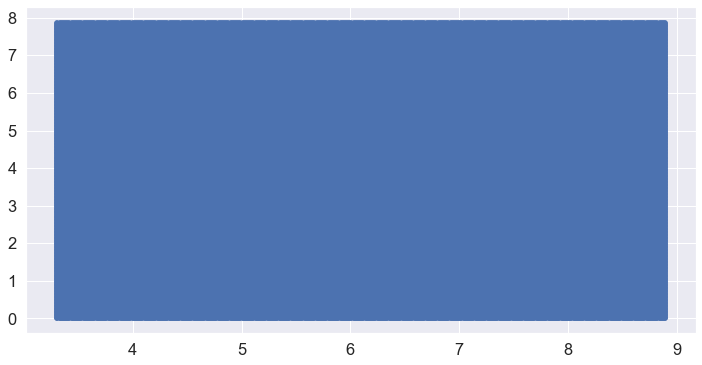

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(xx, yy, 'b.');


In [42]:
len(xx), len(yy)

(790, 790)

In [43]:
len(xx[0])

560

In [44]:
xx

array([[3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       ...,
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89],
       [3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89]])

In [100]:
yy

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       ...,
       [7.87, 7.87, 7.87, ..., 7.87, 7.87, 7.87],
       [7.88, 7.88, 7.88, ..., 7.88, 7.88, 7.88],
       [7.89, 7.89, 7.89, ..., 7.89, 7.89, 7.89]])

In [45]:
# ravel returns a copy only (not a separate copy)
xx.ravel()

array([3.3 , 3.31, 3.32, ..., 8.87, 8.88, 8.89])

In [46]:
yy.ravel()

array([0.  , 0.  , 0.  , ..., 7.89, 7.89, 7.89])

#### np.c_

In [103]:
xx1.ravel()

array([1.  , 1.01, 1.02, ..., 2.97, 2.98, 2.99])

In [104]:
yy1.ravel()

array([11.  , 11.  , 11.  , ..., 12.99, 12.99, 12.99])

In [105]:
np.c_[xx1.ravel(), yy1.ravel()]

array([[ 1.  , 11.  ],
       [ 1.01, 11.  ],
       [ 1.02, 11.  ],
       ...,
       [ 2.97, 12.99],
       [ 2.98, 12.99],
       [ 2.99, 12.99]])

back to the main code ...

In [47]:
# Use either of the following functions to flatten the multidimensional arrays
# of xx & yy and make class predictions on those coordinates
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z1= clf.predict(np.c_[xx.flatten(), yy.flatten()])

Z2= clf.predict(np.c_[xx.reshape(len(xx)*len(xx[0]),1), yy.reshape(len(yy)*len(yy[0]),1)])

In [48]:
# Print Z values to understand the output
print(Z)
print(Z1)
print(Z2)

[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]
[0 0 0 ... 2 2 2]


In [108]:
len(Z)

442400

In [49]:
# Reshape Z as per xx array
Z =  Z.reshape(xx.shape)
Z1= Z1.reshape(xx.shape)
Z2= Z2.reshape(xx.shape)

In [50]:
# Print Z values to understand the output
print(Z)
# print(Z1)
# print(Z2)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


In [51]:
# Create figure in memory with default parameter values
plt.figure();

plt.rcParams["axes.axisbelow"] = False

# Create list of three colors (corresponding to three class values)
# light_colors =  ListedColormap(['gray', 'c', 'silver'])      # 'c' for cyan and 'g' for green
# bold_colors  =  ListedColormap(['r',    'k', 'yellow'])      # 'r' for red  and 'k' for black 

light_colors = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
bold_colors  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<Figure size 432x288 with 0 Axes>

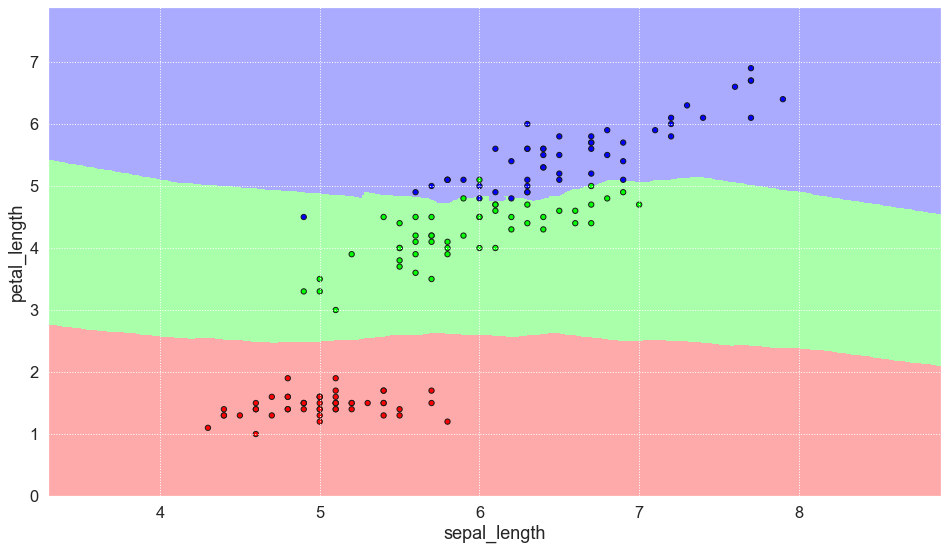

In [53]:
# Color every cell defined by arrays xx & yy as per values of Z
# there are a total of xx * yy cells. 
# Z is also of same size.
# Each cell is colored in either of 3 colors as per corresponding value of Z (class).

plt.figure(figsize=(16, 9))

# Show the grid lines as dark grey lines
plt.pcolormesh(xx, yy, Z,  cmap=light_colors) # Invoke only one of the functions
#################
# plt.title("Iris-classification (weights = '%s')"  % ('uniform'))

#Plot the iris test data 
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=bold_colors, edgecolor='k', s=28)

#######################

plt.xlabel(features_selected[0])
plt.ylabel(features_selected[1])

plt.grid(linestyle='dotted')

#plt.legend(loc='best');
plt.axis('tight');

#### vary all parameters in class KNeighborsClassifier. Parameter values are as below:

- n_neighbors:   Values 3 or 15

- weights:       Values 'uniform' or 'distance'

- algorithm:     Values 'auto', 'brute', 'ball_tree' or 'kd_tree'

- p:             Values 1 or 2

__2 x 2 x 4 x 2 = 32 choices. __

use ‘for’ loop to cycle through these 32 combinations, one by one, evaluate accuracy and draw decision boundaries for each.

In [87]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
features_selected = ['sepal_length', 'sepal_width']

In [88]:
# Slice df to include only cols 0 & 1
#X = df.iloc[:, :2]  
X = df[features_selected]
y = df['class']     # Get last column

h = .01

In [89]:
# # import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]
# y = iris.target


In [316]:
# Create color maps from a list of colors
light_colors =  ListedColormap(['blue', 'c', 'g'])
bold_colors  =  ListedColormap(['r', 'k', 'yellow'])

# neighbors: 3, Distance metric: Manhattan distance, Algorithm : auto, weights: uniform, Accuracy : 0.8533333333333334
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : auto, weights: distance, Accuracy : 0.9266666666666666
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : ball_tree, weights: uniform, Accuracy : 0.86
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : ball_tree, weights: distance, Accuracy : 0.9266666666666666
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : kd_tree, weights: uniform, Accuracy : 0.8533333333333334
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : kd_tree, weights: distance, Accuracy : 0.9266666666666666
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : brute, weights: uniform, Accuracy : 0.84
# neighbors: 3, Distance metric: Manhattan distance, Algorithm : brute, weights: distance, Accuracy : 0.9266666666666666
# neighbors: 3, Distance metric: Euclidean distance, A

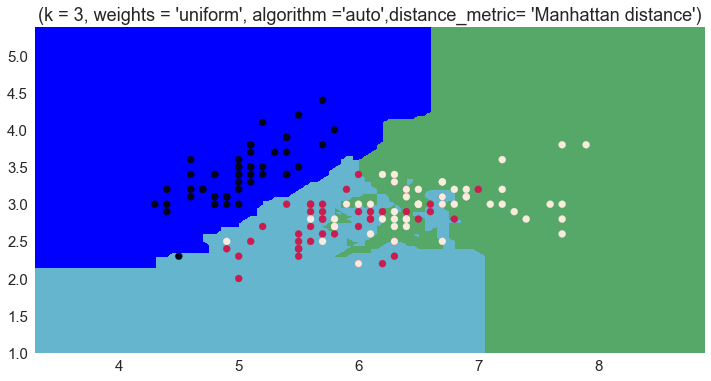

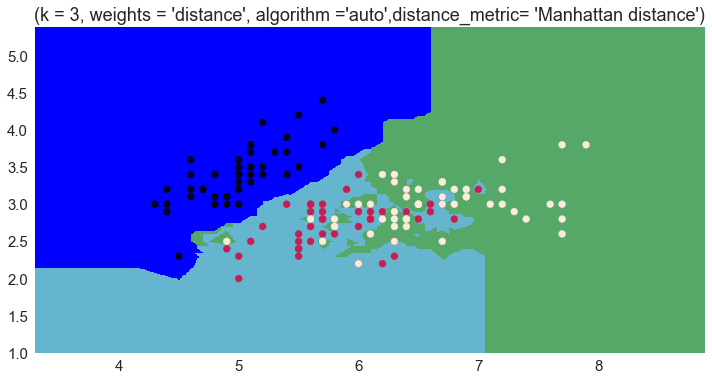

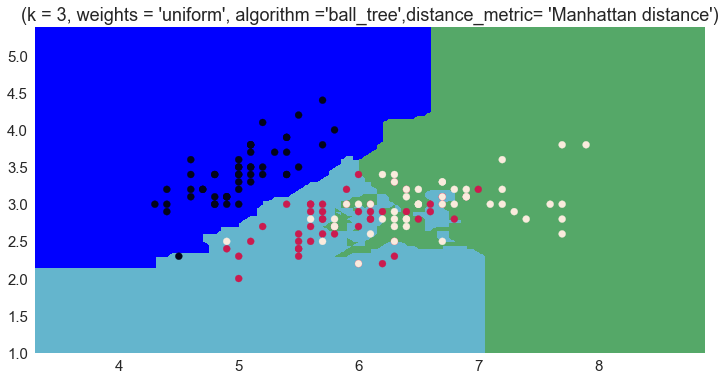

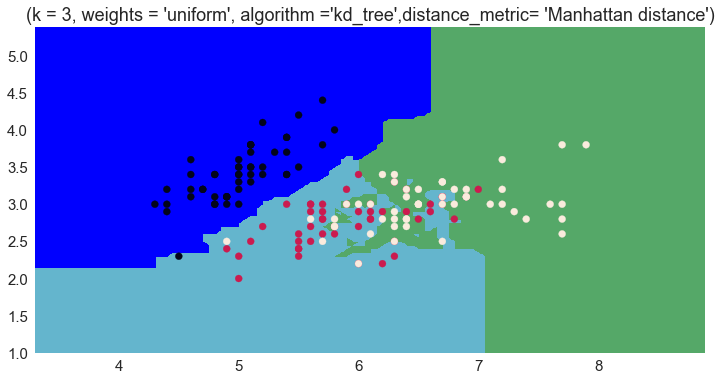

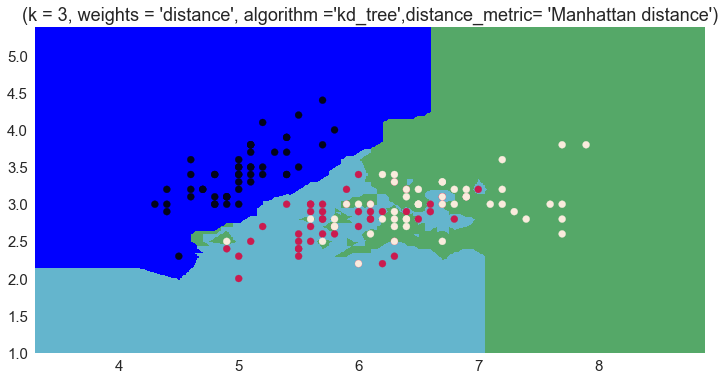

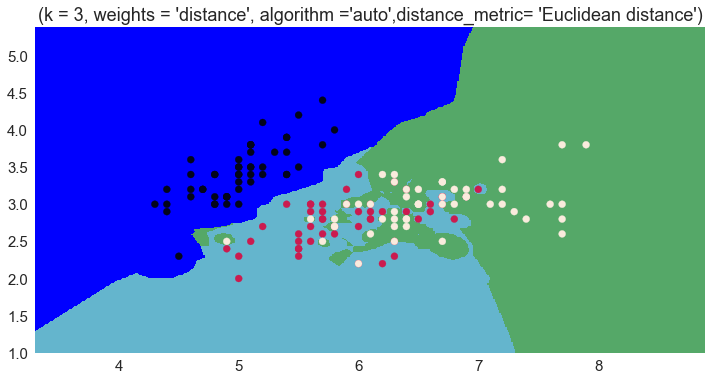

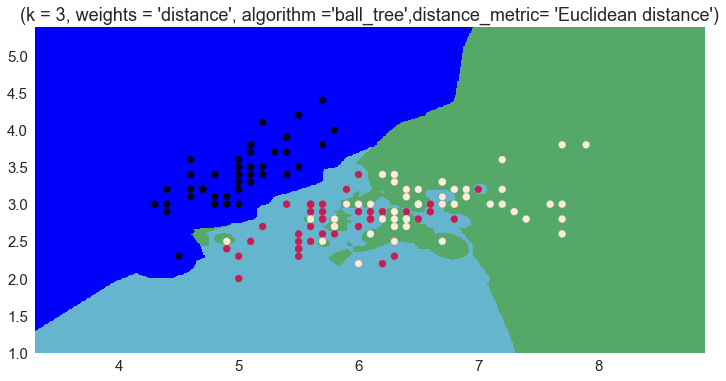

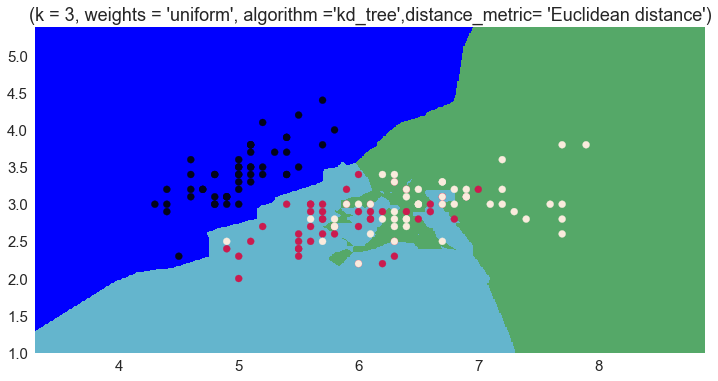

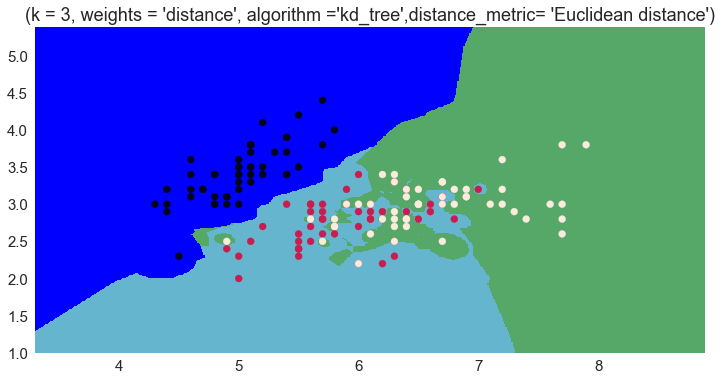

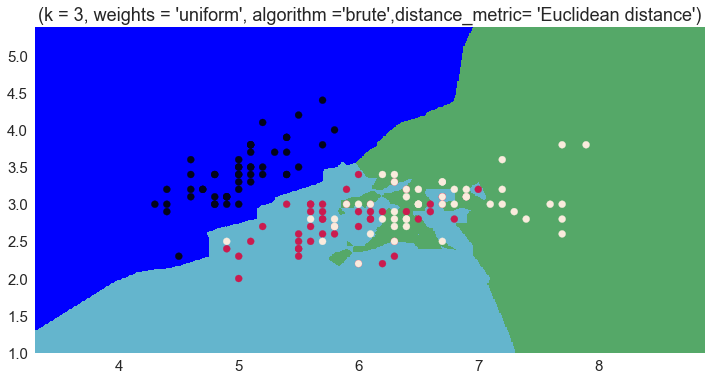

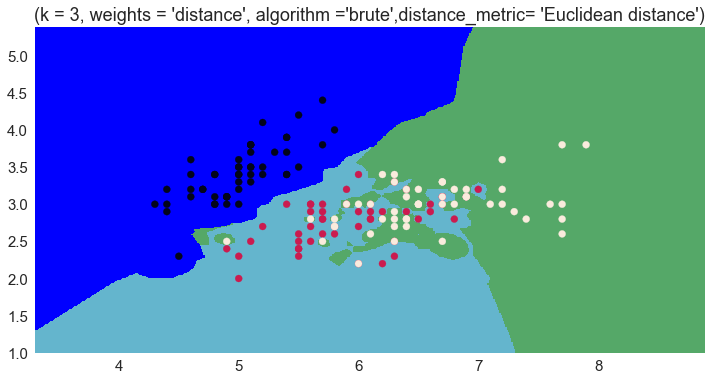

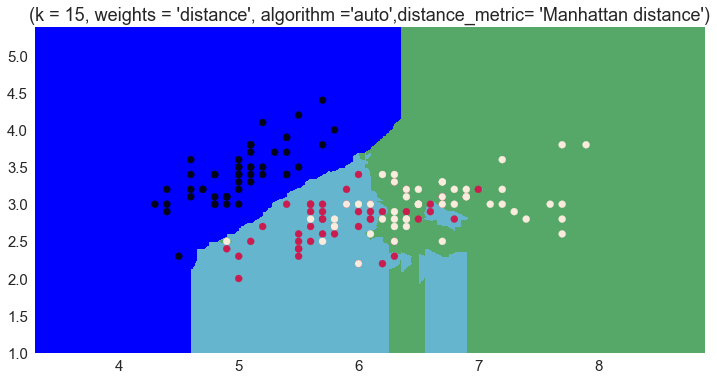

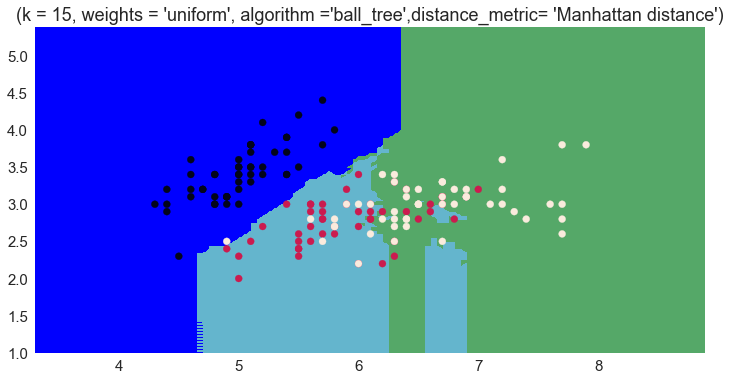

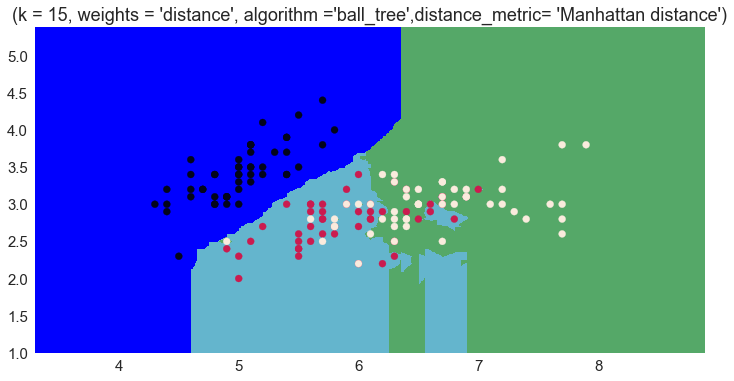

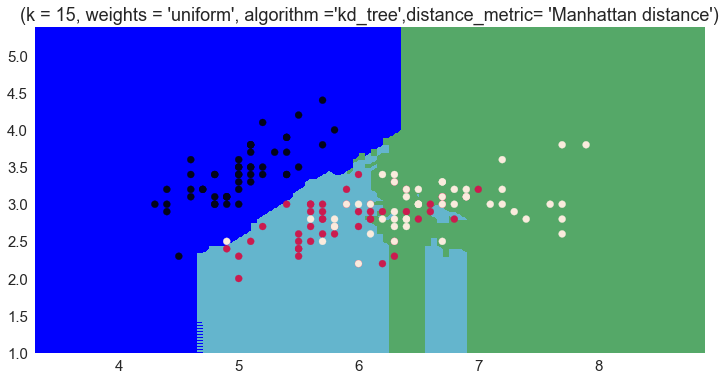

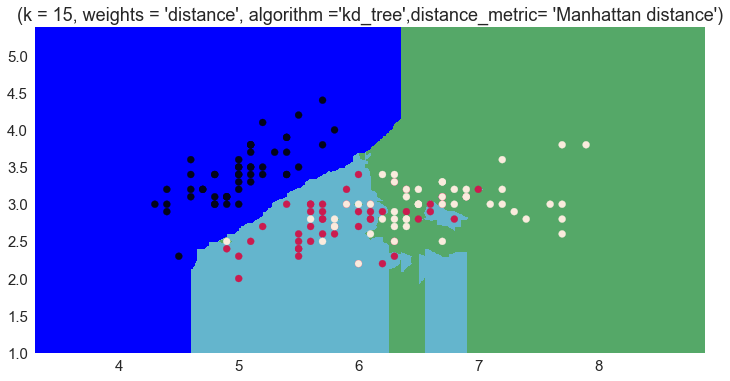

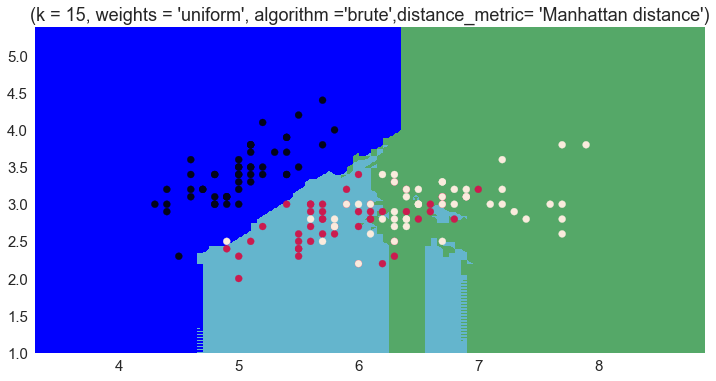

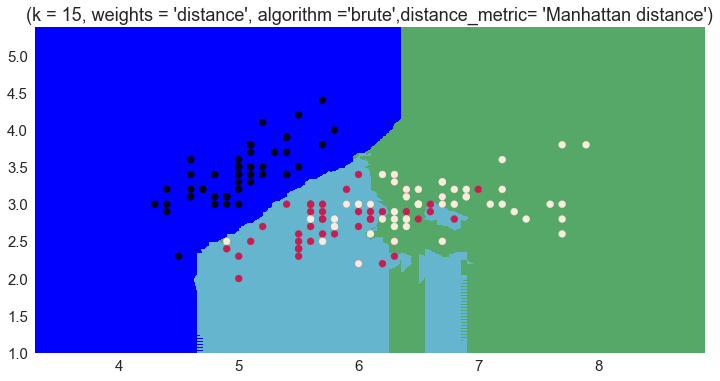

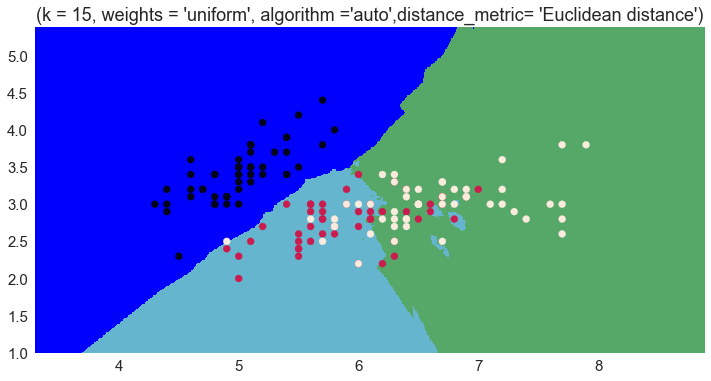

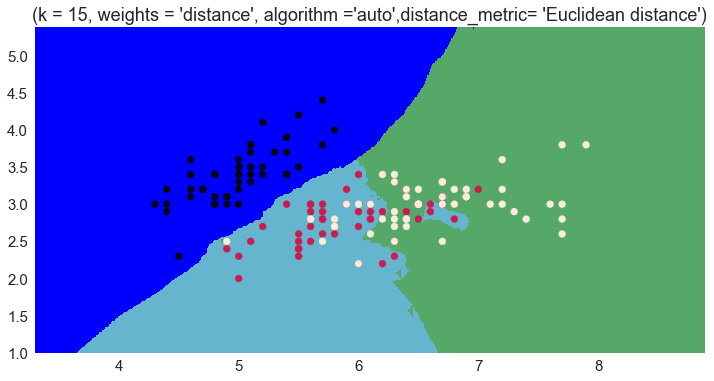

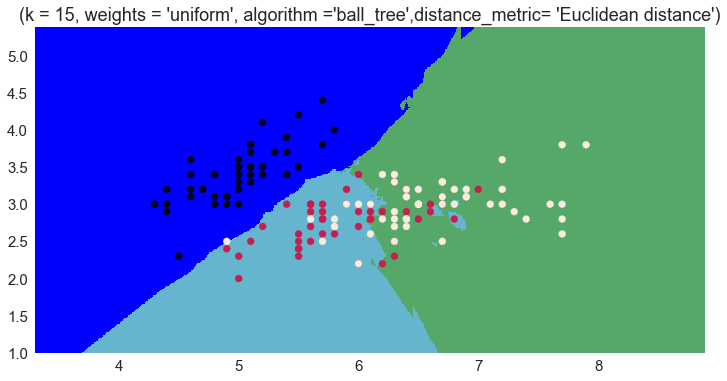

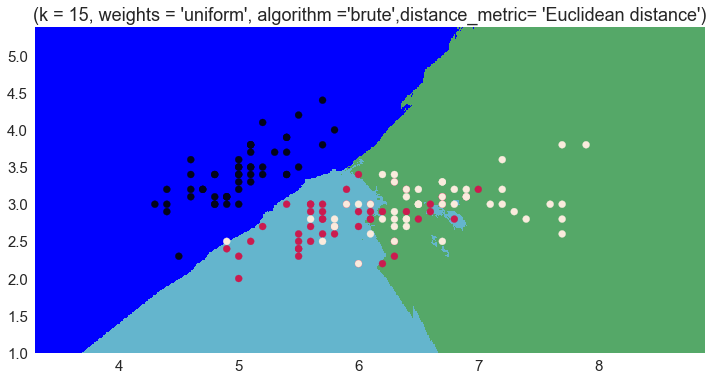

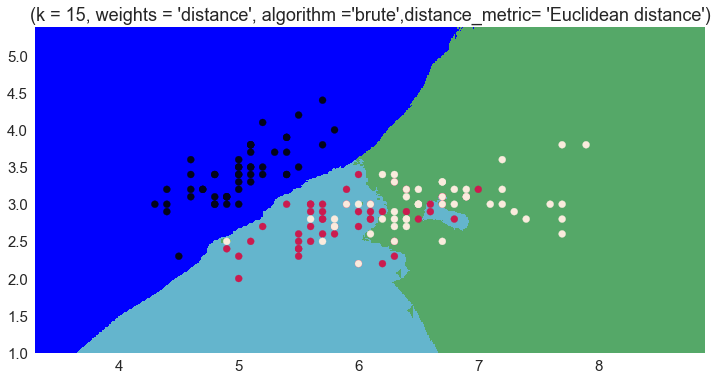

In [331]:
# uniform and distance are two arguments

for n_neighbors in [3, 15]:
    for distancemetric in [1, 2]:
        for algorithms in ['auto', 'ball_tree', 'kd_tree', 'brute']:
            for weights in ['uniform', 'distance']:
                if (distancemetric == 1):
                    d_metric="Manhattan distance"
                else:
                    d_metric="Euclidean distance"
  
                clf = neighbors.KNeighborsClassifier(n_neighbors, 
                                                     weights=weights,
                                                     algorithm=algorithms,
                                                     p=distancemetric )
                clf.fit(X, y)

                x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
                y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        
                xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
                
                Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
                
                accuracy=clf.score(X,y)
                
                print("# neighbors: "+str(n_neighbors)+", Distance metric: "+d_metric+", Algorithm : " + algorithms +  ", weights: "+ weights+ ", Accuracy : "+ str(accuracy))
      
                Z = Z.reshape(xx.shape)
                plt.figure(figsize=(12, 6))
            
                plt.pcolormesh(xx, yy, Z, cmap=light_colors )
                
                # Plot Iris attribute coordinates on demarcated boundaries 
                plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
                plt.title("(k = %i, weights = '%s', algorithm ='%s',distance_metric= '%s')"  % (n_neighbors, weights,algorithms,d_metric))
                plt.axis('tight')   
                


#### Scatter example

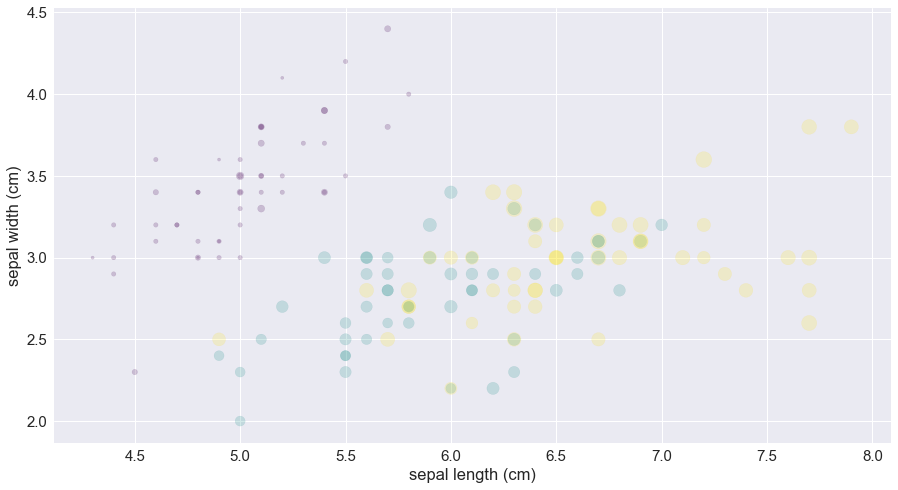

In [232]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.figure(figsize=(15,8))
plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);